## Linear Regression

In [1]:
import pandas as pd; 

In [2]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

data = pd.read_csv(file_url)
data

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [3]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [5]:
round(data.describe(), 2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

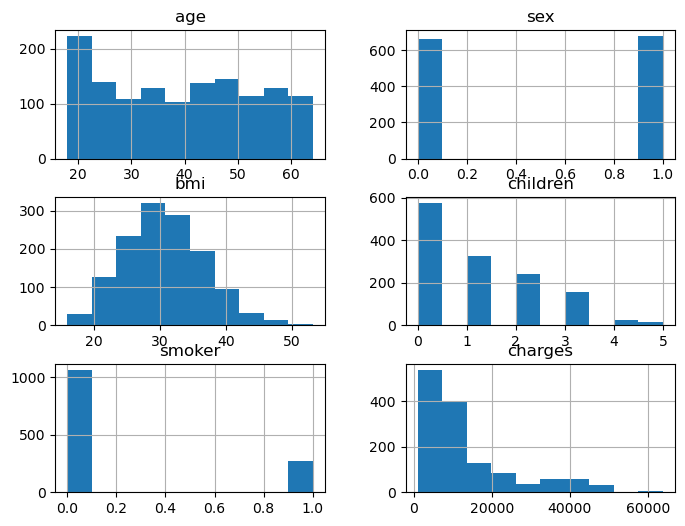

In [6]:
data.hist(figsize=(8, 6))

In [7]:
# 종속 변수와 독립변수의 분리 
# Train set vs Test set 

# X_train, y_train 
# X_test, y_test

In [8]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']] # 독립변수 
y = data['charges'] # 종속변수

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 8:2 비율로 random_state=랜덤 샘플링 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [11]:
from sklearn.linear_model import LinearRegression 

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train) # 학습

LinearRegression()

In [14]:
# 오버피팅: 모델이 학습셋에 지나치게 잘 맞도록 학습되어서 새로운 데이터에 대한 예측력이 떨어지는 현상 
# 과적합, 과학습 

In [15]:
pred = model.predict(X_test)
pred

array([ 4765.24946593,  4957.73086482,  8298.98815254,  3078.81186784,
       24165.95654247, 36827.72848649, 14683.34729348,  2599.3384217 ,
       29378.62194348, 16011.75090087, 15493.17858732,  5101.23688482,
       11011.10641383,  4161.31766196,  9810.62254709, 31856.8853975 ,
       12016.55190749, 13235.61067675,  7251.8789603 , 18394.80961708,
       14393.20060321,  3253.85100146,  6715.71478454, 31290.24757633,
       13776.33709853, 31904.24021054,  6397.17630407, 39339.48397832,
       31565.9666249 , 13742.23078678, 18448.10494977,  2282.95976263,
       38922.93999878, 26116.16609375,  8866.70869349, 12036.24255782,
        8406.17827743, 32351.5635203 ,  3959.06572303, 38354.72996424,
        8219.4129384 , 12308.73069101,  5604.28772112,  8468.4404493 ,
         651.06780185,  5503.69704365,  5673.30373447,  3843.67247433,
        2098.72488739, 11186.31121281, 17460.67125615,  7916.72813038,
        5042.69712676,  8273.18990771,  7541.05592985, 14372.15862948,
      

In [16]:
# 예측 모델 평가하기 
# 1. 테이블로 평가하기  실제 데이터 y_test와 예측한 데이터 pred로 비교함
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})
comparison

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


<Axes: xlabel='actual', ylabel='pred'>

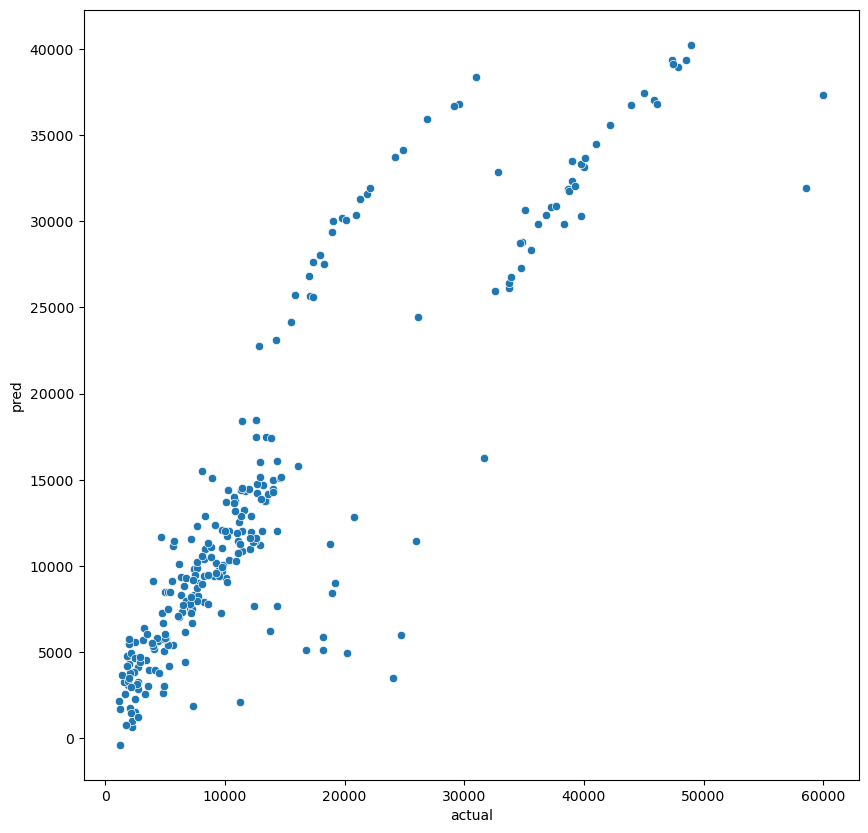

In [17]:
# 2. 그래프로 평가하기 
import matplotlib.pyplot as plt; 
import seaborn as sns; 

plt.figure(figsize=(10, 10))
sns.scatterplot(x = 'actual', y='pred', data = comparison)

3. RMSE(Root mean square error : 루트 평균 제곱근 오차, 평균 제곱근 편차)

실제값과 예측값 사이의 오차를 각각 합산하는 개념 

MAE: 평균 절대오차, |actual - pred| 대한 평균을 계산, 값이 작을 수록 좋은 지표 

MSE: 평균 제곱오차, (actual - pred)^ 2 대한 평균을 계산, 값이 작을수록 좋은 지표 

RMSE : 루트 평균 제곱오차: (actual - pred) ^2 ** 2 에 대한 평균을 계산, 값이 작을수록 좋은 지표


In [18]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test, pred) ** 0.5 # **0.5 는 루트

5684.927776334484

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

3909.118501551299

In [20]:
mean_squared_error(y_test, pred, squared=False) # sqaured=False: RMSE 값을 구함

5684.927776334484

In [21]:
# 평가기준은 상대적이므로 숫자로 예측이 좋은지 판단할 수 없다. 여러 모델을 사용해보고 가장 예측력이 뛰어난 모델을 사용함 

In [22]:
#4. R^2 으로 평가하기 
#R^2 = SSR / SST 

In [23]:
model.score(X_train, y_train) # R^2계산

0.7368220127747351

In [24]:
# 최대 1까지 나올 수 있고, 좋은 모델일 수록 1에 가깝고 0.7-0.8이상이면 일반적으로 괜찮은 수치 
# charges = A * age + B * sex + c * bmi + d * children + e * smoker + i(x절편)

In [25]:
model.coef_ # 각 변수의 기울기

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [26]:
pd.Series(model.coef_, index = X.columns)

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [27]:
# age가 1만큼 증가하면 chargessms 265akszma wmdrkgksek
# 남자(1)이 여자(0) 보다 17정도 더 높다

In [28]:
model.intercept_ #y절편

-11576.99997611236

NameError: name 'x1' is not defined

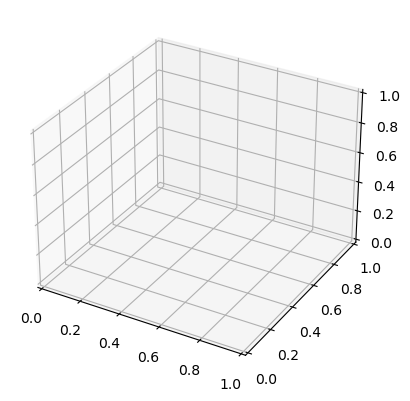

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generating some data for demonstration
x = np.linspace(0, 10, 100)
y = 0
for i in model.coef_ :
    y += i * np.random.rand(100)
y += model.intercept_

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(x1, x2, y, color='blue', label='Data Points')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.title('Multiple Linear Regression')
plt.legend()
plt.show()